# This part of the code will load the python library and will define some functions

In [2]:
#import matplotlib.image as mpimg
import os
import time
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
from rasterio import plot
import numpy as np
import pandas as pd
from sklearn import neighbors
from scipy import interpolate
from scipy import stats



# Defining functions for inside nodata interpolation

def knninter():
    n_neighbors = 50
    weights = 'distance'
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    #knn = neighbors.NearestNeighbors(n_neighbors=n_neighbors)
    ri,ci = np.indices(np.shape(z_mask))
    tr_x = ci[(zi!=nodata_outside) & (zi!=nodata_inside)].flat[:]
    tr_y = ri[(zi!=nodata_outside) & (zi!=nodata_inside)].flat[:]
    tr_z = zi[(zi!=nodata_outside) & (zi!=nodata_inside)].flat[:]
    cord = np.array(list(zip(tr_x,tr_y)))
    y_ = knn.fit(cord, tr_z)
    
    pr_x = ci[(z_mask==m_study) & (zi==nodata_inside)].flat[:]
    pr_y = ri[(z_mask==m_study) &(zi==nodata_inside)].flat[:]
    pr_crd = np.array(list(zip(pr_x,pr_y)))
    pr_z = y_.predict(pr_crd)
    zi[pr_y, pr_x]=pr_z
    return zi

def meaninter():

    ri,ci = np.indices(np.shape(z_mask))
    
    tr_z = zi[(zi!=nodata_outside) & (zi!=nodata_inside)].flat[:]
    
    pr_x = ci[(z_mask==m_study) & (zi==nodata_inside)].flat[:]
    pr_y = ri[(z_mask==m_study) &(zi==nodata_inside)].flat[:]
    
    pr_z = np.mean(tr_z)
    zi[pr_y, pr_x]=pr_z
    return zi

def medianinter():

    ri,ci = np.indices(np.shape(z_mask))
    
    tr_z = zi[(zi!=nodata_outside) & (zi!=nodata_inside)].flat[:]
    
    pr_x = ci[(z_mask==m_study) & (zi==nodata_inside)].flat[:]
    pr_y = ri[(z_mask==m_study) &(zi==nodata_inside)].flat[:]
    
    pr_z = np.median(tr_z)
    zi[pr_y, pr_x]=pr_z
    return zi

def modeinter():

    ri,ci = np.indices(np.shape(z_mask))
    
    tr_z = zi[(zi!=nodata_outside) & (zi!=nodata_inside)].flat[:]
    
    pr_x = ci[(z_mask==m_study) & (zi==nodata_inside)].flat[:]
    pr_y = ri[(z_mask==m_study) &(zi==nodata_inside)].flat[:]
    
    tst1 = np.unique(tr_z,return_counts=True)
    modetest = tst1[0][np.argmax(tst1[1])]
    pr_z = modetest
    zi[pr_y, pr_x]=pr_z
    return zi


def zscore():
    z_mean = np.mean(z_cln[z_mask==m_study])
    z_std = np.std(z_cln[z_mask==m_study])
    z_scr = (z_cln-z_mean)/z_std
    return z_scr
def znormal():
    z_min = np.min(z_cln[z_mask==m_study])
    z_max = np.max(z_cln[z_mask==m_study])
    z_nr = (z_cln-z_min)/(z_max-z_min)
    return z_nr

# This part of the code will load the mask image

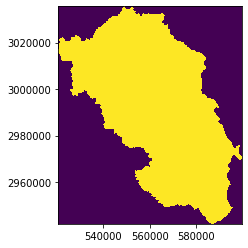

In [3]:
binpath =r'New folder' # Directory of source images
fn_mask = os.path.join(binpath, '0.tif') # Reading the mask image
mask_image = rasterio.open(fn_mask)
show(mask_image)

# Please specify here the mask layer background value and study area value

In [4]:
m_back = -9999 # mask layer background value
m_study = 9999 # mask layer study area value

# Please specify here the nodata of every source images
if you have more than 14 images, create more variables here.

In [5]:
ndt_sr = {'image_1':-3.402823e+38,
          'image_2':-3.402823e+38,
          'image_3':-3.402823e+38,
          'image_4':-3.402823e+38,
          'image_5':-3.402823e+38,
          'image_6':-3.402823e+38,
          'image_7':-3.402823e+38,
          'image_8':-3.402823e+38,
          'image_9':-3.402823e+38,
          'image_10':-3.402823e+38,
          'image_11':-3.402823e+38,
          'image_12':255,
          'image_13':15,
          'image_14':-3.402823e+38,
         }

# Please specify here the nodata imputation method name  inside the study area
If you have more than 14 images, add more variables.
Available methos are

    knninter for KNN interpolation
    meaninter for mean value 
    medianinter for median value
    modeinter for mode value
Keep in mind that these interpolations will be active if there are any nodata inside the study area.

In [6]:
inter_methods = {'image_1':knninter,
                'image_2':meaninter,
                'image_3':meaninter,
                'image_4':meaninter,
                'image_5':meaninter,
                'image_6':meaninter,
                'image_7':medianinter,
                'image_8':medianinter,
                'image_9':medianinter,
                'image_10':medianinter,
                'image_11':modeinter,
                'image_12':modeinter,
                'image_13':modeinter,
                'image_14':meaninter}

# Please specify here the standardiztion and normaliztion method name for every image
If you have more than 14 images, add more variables. Available methods are
1. zscore
2. znormal

In [7]:
stn_methods = {'image_1':zscore,
                'image_2':zscore,
                'image_3':zscore,
                'image_4':znormal,
                'image_5':znormal,
                'image_6':znormal,
                'image_7':znormal,
                'image_8':znormal,
                'image_9':zscore,
                'image_10':zscore,
                'image_11':zscore,
                'image_12':znormal,
                'image_13':znormal,
                'image_14':znormal}

# Before adding image values please the save the image with corresponding name to the same folder as other images 
### like: 
image_(image number)

In [8]:


count=len(stn_methods)
print(stn_methods)
ask= str(input('Do you want to add image_'+str(count+1)+' no data value, nodata imputation method, standardiztion and normaliztion method. \nEnter C or c to Continue  \nAny key to skip'))
while ask=="C" or ask=="c":
    count=count+1
    
    ndt_sr_val=float(input('enter null value for image_'+str(count)+' : '))
    
    ndt_sr['image_'+str(count)] = ndt_sr_val
    
    inter_methods_val=int(input('enter null value for image_'+str(count)+'\n press\n 1 : KNN interpolation \n 2 : mean value \n 3 : median value \n 4 : mode value'))
    
    if(inter_methods_val==1):
        inter_methods['image_'+str(count)] = knninter
    if(inter_methods_val==2):
        inter_methods['image_'+str(count)] = meaninter
    if(inter_methods_val==3):
        inter_methods['image_'+str(count)] = medianinter
    if(inter_methods_val==4):
        inter_methods['image_'+str(count)] = modeinter

        
    stn_methods_val=int(input('enter null value for image_'+str(count)+'\n press\n 1 : zscore \n 2 : znormal \n'))
    
    if(stn_methods_val==1):
        stn_methods['image_'+str(count)] = zscore
    if(stn_methods_val==2):
        stn_methods['image_'+str(count)] = znormal
    

    

    ask= str(input('Do you want to add image_'+str(count+1)+' no data value, nodata imputation method, standardiztion and normaliztion method. \nEnter C or c to Continue  \nAny key to skip'))
    
    if ask!="C" or ask!="c":
        break
    
# stn_methods

{'image_1': <function zscore at 0x00000011038CFB70>, 'image_2': <function zscore at 0x00000011038CFB70>, 'image_3': <function zscore at 0x00000011038CFB70>, 'image_4': <function znormal at 0x00000011038CFBF8>, 'image_5': <function znormal at 0x00000011038CFBF8>, 'image_6': <function znormal at 0x00000011038CFBF8>, 'image_7': <function znormal at 0x00000011038CFBF8>, 'image_8': <function znormal at 0x00000011038CFBF8>, 'image_9': <function zscore at 0x00000011038CFB70>, 'image_10': <function zscore at 0x00000011038CFB70>, 'image_11': <function zscore at 0x00000011038CFB70>, 'image_12': <function znormal at 0x00000011038CFBF8>, 'image_13': <function znormal at 0x00000011038CFBF8>, 'image_14': <function znormal at 0x00000011038CFBF8>}
Do you want to add image_15 no data value, nodata imputation method, standardiztion and normaliztion method. 
Enter C or c to Continue  
Any key to skip


# This part of the code will remove nodata from all (14) the image and interpolate and replace the nodata inside the study area

In [9]:
z_mask = mask_image.read(1) # saving z value from mask image

# Directory for saving cleaned images
bin_new = r'cleaned_image' 


for i in range(1,len(stn_methods)+1): #The loop is going through each tif image (1-14) from the directory.
    fn_1 = os.path.join(binpath, '{}.tif'.format(i))
    image1 = rasterio.open(fn_1)



    zi = image1.read(1) # Reading z value from image
    nodata_outside = -9999 # Setting the nodata value outside (replacing the nodata outside) 
                            # You can set the value, as you want.
    zi[z_mask==m_back] = nodata_outside
    
    #val = np.unique(zi[z_mask==m_study])
    #idx = np.argmin(np.abs(val-ndt))
    #val_ndt = val[idx]
    #print(float(val_ndt))
    
    ndt =ndt_sr['image_{}'.format(i)] #
    crt_int = np.size(zi[(z_mask==m_study) &(zi==ndt)])
    #print (i, crt_int, ndt)
    if crt_int!=0:
        print ('NoData found inside the study area of image-{}. Interpolation started-'.format(i), inter_methods['image_{}'.format(i)].__name__[:-5])
        nodata_inside =-9999 #Setting the nodata value inside (replacing the nodata inside) 
        zi[(z_mask==m_study) & (zi==ndt)] = nodata_inside
        
        zi = inter_methods['image_{}'.format(i)]()
        print ('Image-{}'.format(i),'Interplation done')
    else:
        print ('No interpolation is conducted inside the study area of image-{}'.format(i))
    try:
        os.remove(os.path.join(bin_new, '{}_new.tif'.format(i)))
    except:
        pass
    new_dataset = rasterio.open(
        os.path.join(bin_new, '{}_new.tif'.format(i)),
        'w',
        driver='GTiff',
        height=zi.shape[0],
        width=zi.shape[1],
        count=1,
        dtype=zi.dtype,
        crs=image1.crs,
        transform=image1.transform,
        compress='lzw',
        nodata=None)
    new_dataset.write(zi, 1)
    new_dataset.close()

No interpolation is conducted inside the study area of image-1
No interpolation is conducted inside the study area of image-2
No interpolation is conducted inside the study area of image-3
No interpolation is conducted inside the study area of image-4
No interpolation is conducted inside the study area of image-5
No interpolation is conducted inside the study area of image-6
No interpolation is conducted inside the study area of image-7
No interpolation is conducted inside the study area of image-8
No interpolation is conducted inside the study area of image-9
No interpolation is conducted inside the study area of image-10
No interpolation is conducted inside the study area of image-11
No interpolation is conducted inside the study area of image-12
No interpolation is conducted inside the study area of image-13
No interpolation is conducted inside the study area of image-14


# This part of the code will standardize or normalise the cleaned images.

In [10]:
z_mask = mask_image.read(1) # saving z value from mask image

# Directory for saving standardize or normalize images.
bin_stn = r'Modified_image' 


for i in range(1,len(stn_methods)+1): #The loop is going through each tif image (1-14) from the directory.
    fn_cln = os.path.join(bin_new, '{}_new.tif'.format(i))
    image_cln = rasterio.open(fn_cln)

    z_cln = image_cln.read(1) # Reading z value from cleaned image


    z_clt = stn_methods['image_{}'.format(i)]()
    z_clt[z_mask==m_back] = -9999
   
    try:
        os.remove(os.path.join(bin_stn, '{}_mfd.tif'.format(i)))
    except:
        pass
    new_dataset = rasterio.open(
        os.path.join(bin_stn, '{}_mfd.tif'.format(i)),
        'w',
        driver='GTiff',
        height=z_cln.shape[0],
        width=z_cln.shape[1],
        count=1,
        dtype=z_clt.dtype,
        crs=image_cln.crs,
        transform=image_cln.transform,
        compress='lzw',
        nodata=-9999)
    new_dataset.write(z_clt, 1)
    new_dataset.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide


# This part of the code will convert image with categorical variable to dummy variables 
This action can't be put in a loop. Because every single image can have different action. So I am writing the code for a single image. You can apply it for other image as well.

In [11]:
# Serial number of the cleaned categorical image 
sl = 12 # input ranges from 1 to 14

bin_dm = r'dm_image'

fn_new = os.path.join(bin_new, '{}_new.tif'.format(sl))
new_im = rasterio.open(fn_new)
z_newval = new_im.read(1)
un_vals = np.unique(z_newval[z_mask==m_study])
print (un_vals)

[9999]


Now specify a dummpy array corresponding the actual value above. For example I have made a dummy array below.

In [12]:
dm_arr = np.array([9, 3, 10, 12, 17, 20, 70, 150]) # Dummy array

for k in range(len(un_vals)):
    z_newval[z_newval==un_vals[k]] = dm_arr[k]

    
    
try:
    os.remove(os.path.join(bin_dm, '{}_dm.tif'.format(sl)))
except:
    pass
new_dataset = rasterio.open(
    os.path.join(bin_dm, '{}_dm.tif'.format(sl)),
    'w',
    driver='GTiff',
    height=z_newval.shape[0],
    width=z_newval.shape[1],
    count=1,
    dtype=z_newval.dtype,
    crs=new_im.crs,
    transform=new_im.transform,
    compress='lzw',
    nodata=None)
new_dataset.write(z_newval, 1)
new_dataset.close()


for ht in range(len(dm_arr)):
    z_ht = np.zeros((np.shape(z_newval)), dtype=np.int8)
    z_ht[z_newval==dm_arr[ht]]=1
    
    
    try:
        os.remove(os.path.join(bin_dm, 'hot_encoding_class_{}.tif'.format(dm_arr[ht])))
    except:
        pass
    new_dataset1 = rasterio.open(
        os.path.join(bin_dm, 'hot_encoding_class_{}.tif'.format(dm_arr[ht])),
        'w',
        driver='GTiff',
        height=z_ht.shape[0],
        width=z_ht.shape[1],
        count=1,
        dtype=z_ht.dtype,
        crs=new_im.crs,
        transform=new_im.transform,
        compress='lzw',
        nodata=None)
    new_dataset1.write(z_ht, 1)
    new_dataset1.close()

# This part of the code will convert cleaned image to csv file

In [ ]:
import rasterio
import numpy as np
import csv
strt = time.time()
tt_im = len(stn_methods) # total number of images
count=1


for km in range (1,tt_im+1):
    filename = 'cleaned_image\\'+str(count)+'_new.tif'

    with rasterio.open(filename) as src:
        #read image
        image= src.read()
        # transform image
        bands,rows,cols = np.shape(image)
        image1 = image.reshape (rows*cols,bands)
        print(np.shape(image1))
        # bounding box of image
        l,b,r,t = src.bounds
        #resolution of image
        res = src.res
        res = src.res
        # meshgrid of X and Y
        x = np.arange(l,r, res[0])
        y = np.arange(t,b, -res[0])
        X,Y = np.meshgrid(x,y)
        print (np.shape(X))
        # flatten X and Y
        newX = np.array(X.flatten(1))
        newY = np.array(Y.flatten(1))
        print (np.shape(newX))
        # join XY and Z information
        export = np.column_stack((newX, newY, image1))
        fname='image_csv\\'+str(count)+'_XYZ.csv'
        count=count+1
        with open(fname, 'w') as fp:
            a = csv.writer(fp, delimiter=',')
            a.writerows(export)
            fp.close() # close file

(47212591, 1)
(7481, 6311)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


(47212591,)
(47212591, 1)
(7481, 6311)
(47212591,)
(47212591, 1)
(7481, 6311)
(47212591,)
(47212591, 1)
(7481, 6311)
(47212591,)
(47212591, 1)
(7481, 6311)
(47212591,)


In [ ]:
# strt = time.time()
# tt_im = 14 # total number of images

# ryi,cxi = np.indices(np.shape(z_mask))

# tr_cxi = cxi[z_mask==m_study].flat[:]
# tr_ryi = ryi[z_mask==m_study].flat[:]

# binpath1 =r'D:\WaseemBhaiWork\work\work_2019_10_2\Image_Masking\cleaned_image' # Directory of images you want to convert csv

# image_dt = {}

# for km in range (1,tt_im+1):

#     fn_1new = os.path.join(binpath1, '{}_new.tif'.format(km))
#     new_im = rasterio.open(fn_1new)
#     image_dt['z{}'.format(km)] = new_im.read(1)

    

# binpath2 = r'D:\WaseemBhaiWork\work\work_2019_10_2\Image_Masking\image_csv' #directory of csv file

# try:
#     os.remove(os.path.join(binpath2, 'image_all_dt.csv'))
# except:
#     pass

# image_data_all = {'x':[], 'y':[]}

# for kc in range(1, tt_im+1):
#     image_data_all['z{}'.format(kc)] = []

# for kn in range(len(tr_cxi)):
#     image_data_all['x'].append(mask_image.xy(tr_ryi[kn],tr_cxi[kn])[0])
#     image_data_all['y'].append(mask_image.xy(tr_ryi[kn],tr_cxi[kn])[1])
#     for kp in range(1, tt_im+1): 
#         image_data_all['z{}'.format(kp)].append(image_dt['z{}'.format(kp)][tr_ryi[kn],tr_cxi[kn]])
# #f.close()
# image_pd1 = pd.DataFrame(data=image_data_all)

# image_pd1.to_csv(os.path.join(binpath2, 'image_all_dt.csv'), index=False)
# rtime = (time.time()-strt)/60
# print ('Time= {} Minutes and {} Seconds'.format(int(rtime), np.round(((rtime-int(rtime))*60),2)))

# This part of the code will stack the cleaned images and plot all togather

In [ ]:
binpath3 = r'cleaned_image'
tt_im = len(stn_methods) # total number of images
plt.figure(figsize=(20, 20))
for plg in range(1, tt_im+1):
    fn_fg = os.path.join(binpath3, '{}_new.tif'.format(plg))
    new_fg = rasterio.open(fn_fg)
    z_fg = new_fg.read(1)
    plt.subplot(4,4,plg)
    plt.imshow(z_fg, cmap='nipy_spectral')
    plt.title('Image-{}'.format(plg))
    plt.savefig(r'Image_stack\image_stack_{}.png'.format(plg), dpi=300)

In [ ]:
# del df['col1']

### this part will create multiple csv files from  single csv

In [ ]:
count_image=1
for img in range(1, tt_im+1):
    column = ['x','y','z']
    tif_df = pd.read_csv('image_csv\\'str(count_image)+'_XYZ.csv',header = None, names = column)

    x,y=tif_df.shape

    #Number of rows in dataframe
    print(x)

    no_of_csv=int(input("enter number of files in which you want to convert single csv"))
    size = x//no_of_csv
    print("number of rows in each sub csv "+str(size))

    count_1=0
    count_2=size
    dfs = []

    i=1
    while i!=no_of_csv:
        df=train_time_series.iloc[count_1:count_2]
        df.to_csv('sub_csv\\image_'+str(count_image)+'subfile '+ str(i)+'.csv')

        dfs.append(df)
        count_1=count_1+size
        count_2=count_2+size
        i=i+1

    df=train_time_series.iloc[count_1:]
    df.to_csv('sub_csv\\image_'+str(count_image)+'subfile '+ str(no_of_csv)+'.csv')
    count=count+1

